<a href="https://colab.research.google.com/github/design-behavior/AIFFEL_quest_cr/blob/main/DeepLearning_CV_study/2_%EB%8B%A4%EC%B8%B5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0(Multi_Layer_Perceptron)_%EA%B5%AC%EC%A1%B0_%EB%B3%B5%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import sys
import tensorflow as tf
import numpy as np

# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


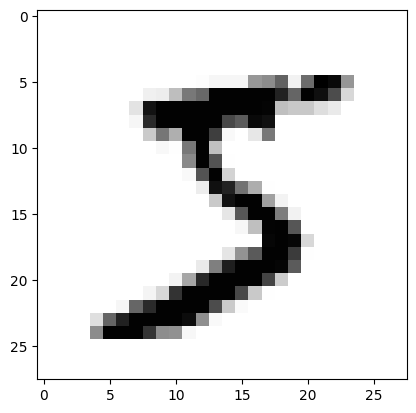

In [24]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [25]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [26]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [28]:
# 데이터셋 행렬의 크기를 다시 확인해봅시다.
# X_train의 경우 (60000, 28, 28)에서 (60000, 784)로 변형된 것을 확인할 수 있습니다.
print(X_train.shape) # 28 x 28의 이미지가 60,000장 > (60000, 784)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [30]:
# label의 경우 현재 0~9의 정수 값을 가지고 있습니다.
# 이 값들을 분류 문제에 맞게 one-hot vector로 만들어줍시다.
# Y_train, Y_test의 shape을 다시 보면 길이가 10인 벡터 60,000개(test는 10,000개)가 묶인 형태로 바뀐 것을 확인할 수 있습니다.

# 원-핫 인코딩은 "단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고,
# 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식이며, 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)"라고 합니다. (출처: 위키독스)

# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

---
첫번째 출력

- (60000, 10)
- (10000, 10)
- [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

In [32]:
# 본격적으로 MLP 모델을 만들어봅시다. 모델을 만드는 여러 가지 방법이 있지만 여기서는 Functional API로 만들어 봅시다.

# 이번에 구현할 모델은 input layer와 두 개의 hidden layer, 그리고 output layer로 구성되어 있습니다.
# 특히 output layer는 특별한 task를 수행하는데, 이 경우에는 10개의 class를 분류 (multi-class classification)하는 것입니다.
# 만약 output layer의 perceptron이 회귀 문제에서와 같이 실수 출력 값을 가진다면 수행하고자 하는 분류 task에 적절하지 않습니다.
# 왜냐 하면 분류 문제에서 label 값은 one-hot vector로 인코딩되고, 이것은 특정 클래스에 속할 확률이 1이라고 해석될 수 있기 때문입니다.
# 그러므로 10개의 perceptron에서 나온 출력을 확률 값으로 만들기 위해 활성화 함수로 softmax를 사용해야 합니다.


# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 모델의 loss 함수, optimizer, metric을 설정하고 모델을 compile해줍시다.
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [35]:
# MLP 모델 Training 하기
# model.fit() 함수를 이용하여 모델 학습을 시작합니다.

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(1000, 784))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - categorical_accuracy: 0.6549 - loss: 31.5818 - val_categorical_accuracy: 0.9193 - val_loss: 1.3382
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - categorical_accuracy: 0.9314 - loss: 0.9823 - val_categorical_accuracy: 0.9398 - val_loss: 0.7174
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - categorical_accuracy: 0.9590 - loss: 0.3729 - val_categorical_accuracy: 0.9433 - val_loss: 0.6215
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - categorical_accuracy: 0.9734 - loss: 0.1748 - val_categorical_accuracy: 0.9484 - val_loss: 0.5464
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - categorical_accuracy: 0.9832 - loss: 0.0924 - val_categorical_accuracy: 0.9476 - val_loss: 0.5115
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - categorical_accuracy: 0.9887 - loss: 0.0531 - val_categorical_accuracy: 0.9503 - val_loss: 0.5074
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - categorical_accuracy: 0.9937 - loss: 0.0248 - val_c

In [63]:
# training loss와 validation loss를 확인해봅시다.

# Training loss 확인하기
loss = history.history['loss']
print(loss)
print(len(loss))

[12.830034255981445, 0.8242332935333252, 0.36645251512527466, 0.1843387484550476, 0.09455999732017517, 0.0537278912961483, 0.025740161538124084, 0.010510170832276344, 0.00409930944442749, 0.0013204237911850214, 0.0004791038518305868, 0.0002558384439907968, 0.0001886925456346944, 0.00016505722305737436, 0.0001489950664108619, 0.00013656599912792444, 0.00012607366079464555, 0.00011729516700142995, 0.00010984222171828151, 0.00010317585110897198, 9.713634790387005e-05, 9.188147669192404e-05, 8.719080506125465e-05, 8.263269410235807e-05, 7.869996625231579e-05, 7.503404776798561e-05, 7.167131843743846e-05, 6.85767809045501e-05, 6.557596498169005e-05, 6.29554851911962e-05]
30


In [64]:
# Q. Validation loss를 확인해 보세요.
# [[YOUR CODE]]

val_loss = history.history['val_loss']
print(val_loss)
print(len(val_loss))

[1.3382357358932495, 0.7174482941627502, 0.6214869618415833, 0.5463589429855347, 0.5114938020706177, 0.5074155330657959, 0.4885707199573517, 0.4825406074523926, 0.4787602424621582, 0.4760831594467163, 0.4755784571170807, 0.47392094135284424, 0.47248315811157227, 0.47226813435554504, 0.47172144055366516, 0.4714370667934418, 0.47119608521461487, 0.47102925181388855, 0.47078484296798706, 0.4706515669822693, 0.4704485237598419, 0.4702132046222687, 0.4701368808746338, 0.47004640102386475, 0.4700113832950592, 0.46994733810424805, 0.4698222577571869, 0.46987849473953247, 0.46957656741142273, 0.4696083068847656]
30


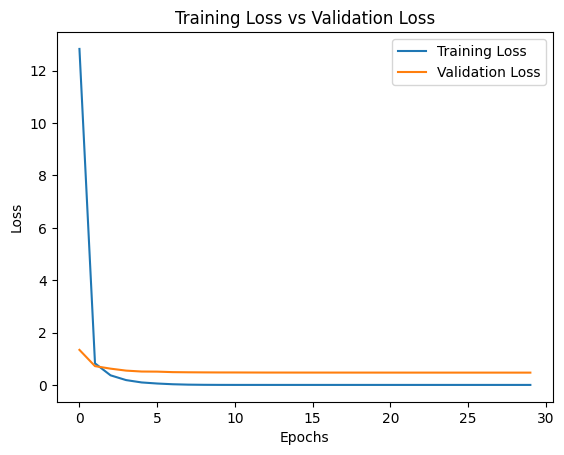

In [54]:
# Training loss vs Validation loss 비교
import matplotlib.pyplot as plt

# Training loss와 Validation loss 그래프 그리기
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()

# Training loss가 감소하고 Validation loss도 감소 → 모델이 잘 학습되고 있음.
# Training loss는 감소하는데 Validation loss가 증가 → 과적합(overfitting) 가능성 있음.
# Training loss와 Validation loss가 거의 비슷하게 유지 → 모델이 잘 일반화되고 있음.

In [55]:
# 학습된 모델의 성능 확인하기
# model.evaluate() 함수에 test 데이터를 입력시켜서 모델의 정확도를 확인하고,
# 학습이 진행되면서 training loss와 test loss가 어떻게 변하는지 그래프를 그려서 확인해봅시다.

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9455 - loss: 0.5446

 Test Accuracy: 0.9541


MLP 모델의 한계를 코드로 확인하기
MLP 모델의 한계를 코드로 확인해 보겠습니다. 원본 데이터를 살짝 변형했을 때 MLP 구조가 이미지를 잘 인식하는지 실펴 보겠습니다.

In [66]:
import sys
import tensorflow as tf
import numpy as np

# OpenCV 모듈 불러오기
import cv2

# MNIST 데이터셋 불러오기_ 원본 데이터를 변형해서 MLP 구조의 성능 테스트하기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


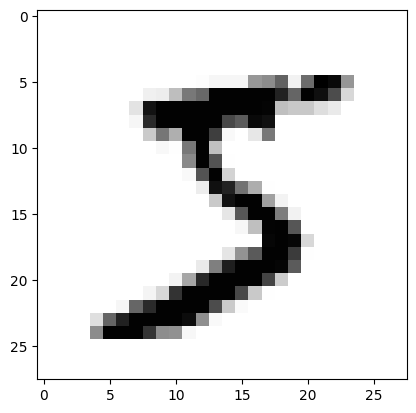

In [67]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

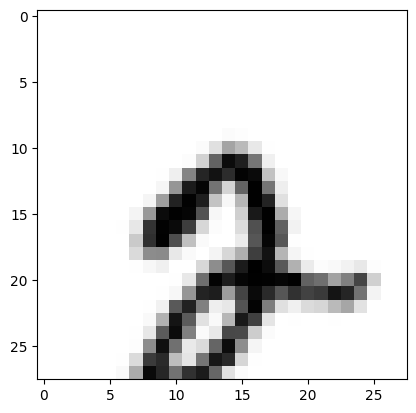

In [68]:
# 이번에는 MNIST 데이터에 장난을 조금 쳐보겠습니다.
# OpenCV의 함수들을 이용해서 MNIST 이미지에 회전 변환과 이동 변환(선형 변환)을 적용합니다.

# 선형 변환을 위해서 변환 매트릭스를 먼저 구하고, 이미지에 변환 매트릭스를 적용해 봅시다.
# 즉 원본 이미지에 선형 변환 매트릭스를 곱하여 원본 이미지를 변환하는 것입니다.

# 이미지 회전 변환 메트릭스 구하기
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

# 변환된 이미지는 다음과 같습니다.
plt.imshow(test_image, cmap='Greys')

In [69]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


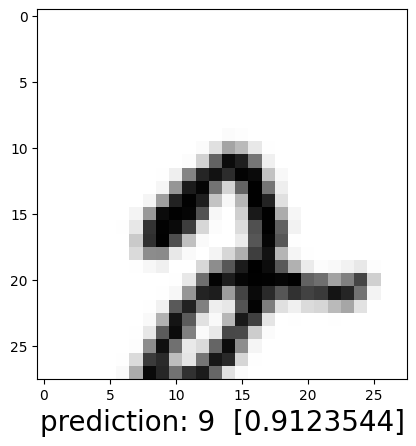

In [70]:
Y_prediction = model.predict(test_image_reshape)

index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()